In [1]:
import h5py
import numpy as np
import scipy
import itertools
from scipy.io import loadmat
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import confusion_matrix

import pandas as pd
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential, load_model
from tensorflow.keras.layers import Reshape, Flatten, Dense, Conv1D ,Conv2D, MaxPooling2D, MaxPooling1D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-20 18:30:30.524642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-20 18:30:30.524680: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


In [2]:
def evaluation_tf(report, y_test, y_pred, classes):
    plt.plot(report.history['loss'], label = 'training_loss')
    plt.plot(report.history['val_loss'], label = 'validation_loss')
    plt.legend()
    plt.show()
    plt.plot(report.history['accuracy'], label = 'training_accuracy')
    plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
    plt.legend()
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, cmap=plt.cm.Blues)
    print(cm.shape[0],cm.shape[1])
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], 'd'),
                 horizontalalignment = 'center',
                 color='black')

    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.show()

In [3]:
model = load_model("/home/user12/Documents/MODCOD_Dir/Mod_3L_4D_NL_tan_16S16.h5")

2022-03-20 18:30:32.857986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-20 18:30:32.858075: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-20 18:30:32.858118: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ipt-Precision-7920-Tower): /proc/driver/nvidia/version does not exist
2022-03-20 18:30:32.858489: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
filename = "/home/user12/Saad_External/MODCOD_DataSet/MOD_DATASET/MOD_Rician0p9fadded_16Samp_N_NN1.h5"
f = h5py.File(filename, 'r')
a_group_key = list(f.keys())
print (a_group_key)


['DATA', 'DATATYPE', 'SNR']


In [5]:
data = np.array(f[a_group_key[0]])            #(600000, 256, 4)
datatype = np.array(f[a_group_key[1]])         #(600000, 1)
SNR = np.array(f[a_group_key[2]])               #(600000, 1)

print(data.shape)
print(datatype.shape)
print(SNR.shape)

(600000, 256, 4)
(600000, 1)
(600000, 1)


In [6]:
print(type(data)) 
print(type(datatype))
print(type(SNR))

print(data.shape)
print(datatype.shape)
print(SNR.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(600000, 256, 4)
(600000, 1)
(600000, 1)


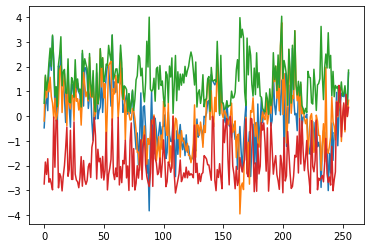

[-0.47567445  0.46727571  0.73854692  0.21875611  1.93779542  2.25322976
  1.84848274  3.2304593   2.22770034  0.39001281  1.17130348 -0.37418926
  2.02778257  1.70700708  2.48364447  1.21784786  1.3403672   0.78008776
 -0.25783153  0.82136646  1.75333523  0.31789082 -0.45148432  1.29673899
  1.16895953  0.74301271  1.58173464  0.9698595   1.32546763  0.96583397
  0.8598991  -0.02514592  2.52732162  0.40366861  1.94701609  1.94828835
  1.64483067  0.30868123  0.84669182  1.03272408 -0.24377043 -0.97795103
  0.54162346 -0.12230816  1.7466846  -0.11153789  0.22152792  0.36004616
  1.57689426  0.14574711  1.17442937  0.93630234  1.65867809  2.02985444
  2.0099646   1.25343291  0.40071375  3.25893588  0.9840856   1.37646215
  0.9595028   1.47100607  1.34874141  1.65741053  1.29986252  1.93697246
  0.14998427  0.43011795  0.65074642  0.85587065  0.07723758  0.89996364
  0.10521495  0.5179008   1.00638661 -0.0580375  -0.65876265 -1.33539778
 -0.68272145 -1.97076733 -0.85006021  0.93487784 -1

In [7]:
point = 800
plt.plot(data[point,:,0])
plt.plot(data[point,:,1])
plt.plot(data[point,:,2])
plt.plot(data[point,:,3])

plt.show()

print(data[point,:,0])
print(datatype[point])
print(SNR[point])

# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
# [-4:2:14]

In [8]:
#data = f[a_group_key[0]]              #(600000, 256, 4)
#datatype = f[a_group_key[1]]          #(600000, 1)
#SNR = f[a_group_key[2]]               #(600000, 1)


#print(data.shape)
#print(datatype.shape)
#print(SNR.shape)

# Six different Modulation each with 100000 in length
# SNR... 10 bins for each modulation

# Result should be list of pair--- (16 symbols packet--- 256, Modulation Scheme (0...5))

# Write into pre-processed training data!

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, datatype, test_size = 0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
                
                

(480000, 256, 4)
(120000, 256, 4)
(480000, 1)
(120000, 1)


In [11]:
report = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

2022-03-20 18:31:03.459569: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1966080000 exceeds 10% of free system memory.


Epoch 1/20
15000/15000 [==============================] - 245s 16ms/step - loss: 0.2856 - accuracy: 0.9014 - val_loss: 0.1239 - val_accuracy: 0.9581
Epoch 2/20
15000/15000 [==============================] - 247s 16ms/step - loss: 0.1479 - accuracy: 0.9510 - val_loss: 0.1087 - val_accuracy: 0.9657
Epoch 3/20
15000/15000 [==============================] - 248s 17ms/step - loss: 0.1255 - accuracy: 0.9596 - val_loss: 0.0854 - val_accuracy: 0.9702
Epoch 4/20
15000/15000 [==============================] - 254s 17ms/step - loss: 0.1134 - accuracy: 0.9635 - val_loss: 0.0815 - val_accuracy: 0.9727
Epoch 5/20
15000/15000 [==============================] - 254s 17ms/step - loss: 0.1055 - accuracy: 0.9662 - val_loss: 0.0705 - val_accuracy: 0.9777
Epoch 6/20
15000/15000 [==============================] - 247s 16ms/step - loss: 0.1017 - accuracy: 0.9682 - val_loss: 0.1254 - val_accuracy: 0.9605
Epoch 7/20
15000/15000 [==============================] - 244s 16ms/step - loss: 0.0966 - accuracy: 0.9692

In [12]:
model.save('Mod_3L_4D_16S16_TF_NL_0p9ricianfadded_N.h5')

In [13]:
y_pred = model.predict(X_test).argmax(axis = 1)

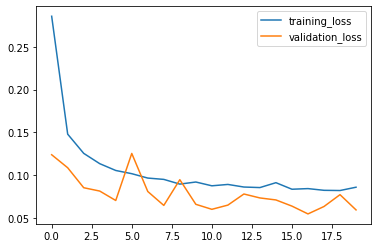

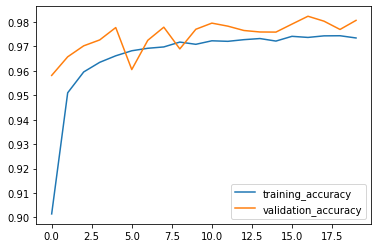

6 6


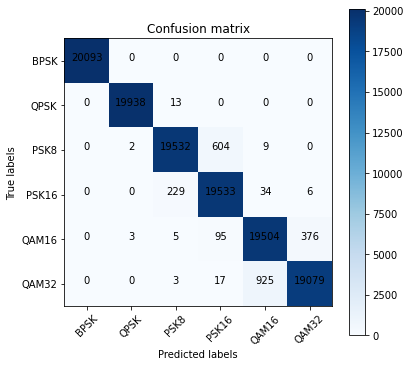

In [14]:
# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
Y = ['BPSK','QPSK','PSK8','PSK16','QAM16','QAM32']
evaluation_tf(report, y_test, y_pred, Y)